## Examine fluctuations pattern in Co2e:

In this project, we aim to examine the **periodic fluctuations** observed in the **Co2e** data. To achieve this, we seeks to address the following research questions

1. What is the average difference between the annual peak and dip values?
2. What is the average time interval (in months) between a peak and the next dip?
3. What is the average time interval (in months) between a dip and the next peak?
4. On which month of the year on average do the peaks and dips occurs?

### 1. Reading the data

In [8]:
import csv

co2e_data = []
data_type = {'year': int, 'month': int, 'day' : int, 'co2_concentration': float, 'ch4_concentration': float, 'co2e': float, 'decimal_year': float}
with open('./data/Co2e_monthly.csv') as f:
    reader =  csv.DictReader(f, skipinitialspace=True)
    for row in reader:
        co2e_data.append({key:data_type[key](val) for key, val in row.items()})

print("Co2e data format")
print(co2e_data[0])

Co2e data format
{'year': 1983, 'month': 7, 'co2_concentration': 344.32, 'ch4_concentration': 1.62598, 'co2e': 384.9695, 'decimal_year': 1983.5}


### 2. Extracting the data:
Since we use **Numpy** for further data processing, it is preferrable to extract and convert the **co2e_concentration** and **decimal_year** fields into a Numpy **ndarry**.

In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update(
        {
            "figure.figsize": (6, 4),
            "font.size": 12,
            "lines.linewidth": 2,
            "lines.markersize": 6,
            "axes.labelsize": 12,
            "axes.titlesize": 12,
            "xtick.labelsize": 10,
            "ytick.labelsize": 10,
            "legend.fontsize": 10,
            "figure.dpi": 300,
        }
)

Text(0, 0.5, 'Concentration (ppm)')

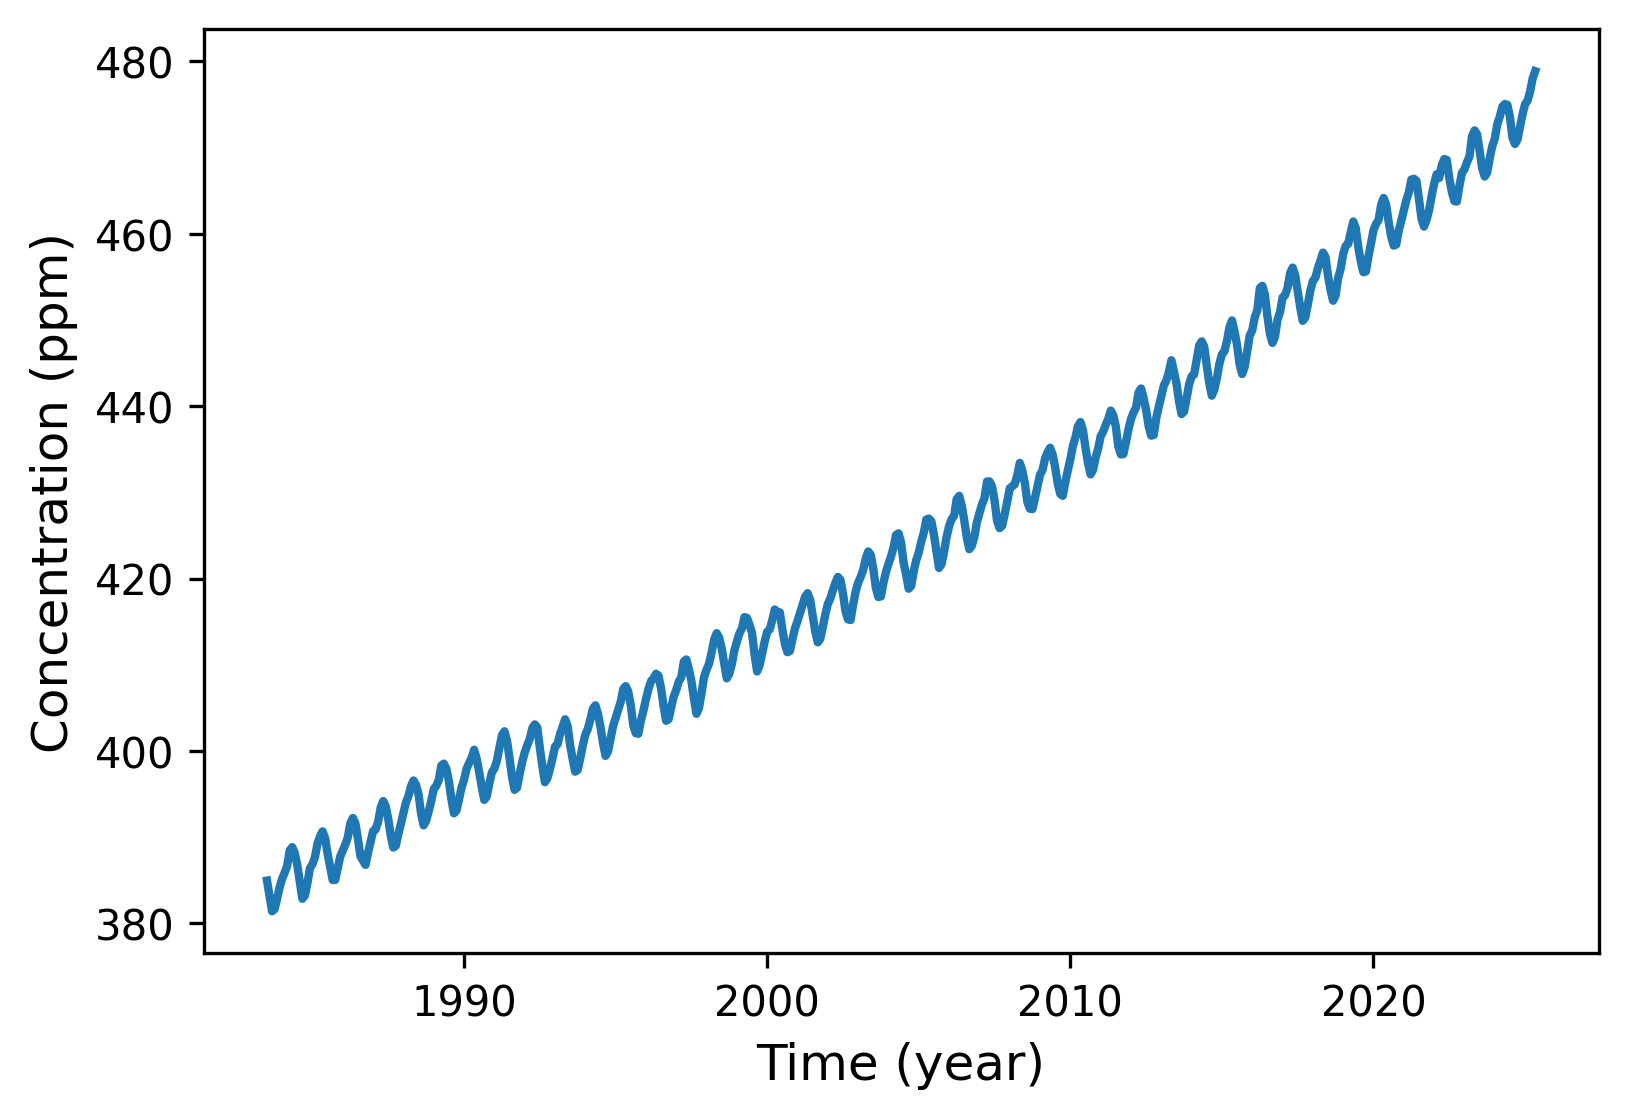

In [17]:
import numpy as np


co2e = np.array([row['co2e'] for row in co2e_data])
decimal_year = np.array([row['decimal_year'] for row in co2e_data])

plt.plot(decimal_year, co2e)
plt.xlabel("Time (year)")
plt.ylabel("Concentration (ppm)")

### 3. Find the peaks and dips
We are now interested in identifying the **peaks** and **dips** of the **co2e* data, as this will help in addressing the research questions.

In [18]:
def find_peaks(data:np.ndarray):
    neigh_left_2 = np.roll(data, 2)
    neigh_left_1 = np.roll(data, 1)
    neigh_right_1 = np.roll(data, -1)
    neigh_right_2 = np.roll(data, -2)
    
    idx = np.where(np.logical_and(
                        np.logical_and(data > neigh_left_1, data > neigh_left_2),
                        np.logical_and(data > neigh_right_1, data > neigh_right_2)))

    return (data[idx], idx[0])
    

In [19]:
def find_dips(data:np.ndarray):
    neigh_left_2 = np.roll(data, 2)
    neigh_left_1 = np.roll(data, 1)
    neigh_right_1 = np.roll(data, -1)
    neigh_right_2 = np.roll(data, -2)
    
    idx = np.where(np.logical_and(
                        np.logical_and(data < neigh_left_1, data < neigh_left_2),
                        np.logical_and(data < neigh_right_1, data < neigh_right_2)))

    return (data[idx], idx[0])

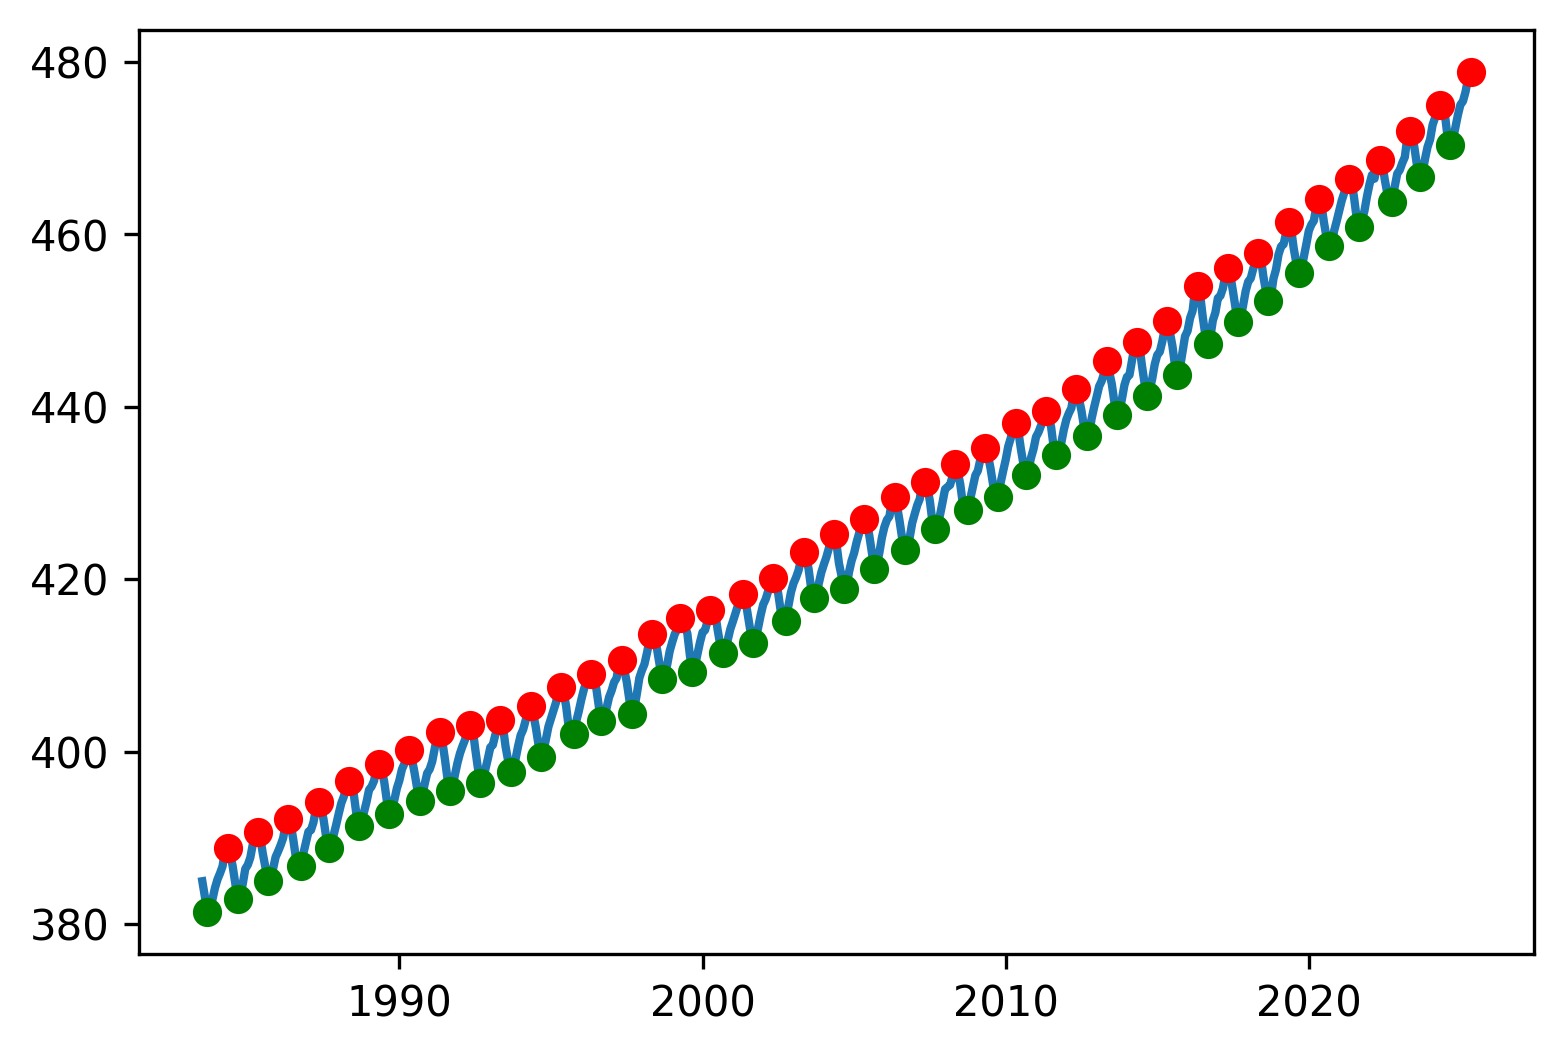

In [22]:
peaks, indices = find_peaks(co2e)
dips, dip_indices = find_dips(co2e)

plt.plot(decimal_year,co2e)
plt.plot(decimal_year[indices], peaks, 'ro')
plt.plot(decimal_year[dip_indices], dips, 'go')
plt.show()

### Answering the questions

### 1. What is the average difference between the annual peak and dip values?

In [28]:
print(np.mean(peaks[:-1]- dips[1:]))

5.7282195121951185


Average difference between annual peak and dip values is **5.73** concentration (ppm).

### 2. What is the average time interval (in months) between a peak and the next dip?

In [39]:
print(round(np.mean(decimal_year[dip_indices[1:]] - (decimal_year[indices[:-1]])) * 12))

4


There are **4** months interval between a peak and the next dip.

### 3. What is the average time interval (in months) between a dip and the next peak?

In [41]:
print(round(np.mean(decimal_year[indices]- decimal_year[dip_indices]) * 12))

8


There are **8** months interval between a dip and the next peak.

### 4. On which month of the year on average do the peaks and dips occurs?

In [49]:
print((np.mean(np.modf(decimal_year[indices])[0])*12) + 1)
print((np.mean(np.modf(decimal_year[dip_indices])[0])*12) + 1)

4.952380952380087
9.142857142857922


On average, the **peak** occurs in **May**, while the **dip** occurs in **September**.